# Project Kojack: Artistic Style

In [ ]:
import os,sys
from PIL import Image
import glob

from keras import backend as K
from keras.utils.np_utils import convert_kernel

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

import numpy as np
import pandas as pd

# What is this?
# import cv2

# Step 1: Get pictures.

In [ ]:
pic_list = []

for pic in os.listdir("../wiki_images/"):
    pic_list.append(pic)
    jpgfile = Image.open("../wiki_images/"+pic)
    print jpgfile.bits, jpgfile.size, jpgfile.format

print (pic_list)

In [ ]:
#synset = pd.read_csv('synset_words.txt', skipinitialspace=True, names = ['synset', 'words'])

# Step 2: Train Neural Network on Picture

### CUDA Torch Code, need to convert to Keras Theano

CUDA_VISIBLE_DEVICES=0     
th feedforward_neural_doodle.lua   
-model_name skip_noise_4   
-masks_hdf5 data/starry/gen_doodles.hdf5   
-batch_size 4   
-num_mask_noise_times 0   
-num_noise_channels 0   
-learning_rate 1e-1   
-half false  

# Step 3: Apply trained network to another picture.

### CUDA Torch Code

Stylize the doodle

After the net is trained you can process any doodle with

python apply.py --colors data/starry/gen_doodles.hdf5colors.npy --target_mask data/starry/style_mask.png --model data/out/starry_night.t7  
  
A pretrained starry_night net is there in pretrained folder. You can try it with

python apply.py --colors pretrained/gen_doodles.hdf5colors.npy --target_mask data/starry/style_mask.png --model pretrained/starry_night.t7


### Get Ling's code for taking a picture and recognizing it to work.

In [1]:
# !curl https://raw.githubusercontent.com/torch/tutorials/master/7_imagenet_classification/synset_words.txt -o synset_words.txt

# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31675  100 31675    0     0   619k      0 --:--:-- --:--:-- --:--:--  736k


In [10]:
from keras import backend as K
from keras.utils.np_utils import convert_kernel

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import pandas as pd

In [11]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [12]:
synset = pd.read_csv('synset_words.txt', skipinitialspace=True, names = ['synset', 'words'])

In [13]:
def get_image():
    retval, im = camera.read()
    return im

In [14]:
CAMERA = 0
K.set_image_dim_ordering('th')

if CAMERA:
    camera_port = 0
    ramp_frames = 30
 
    camera = cv2.VideoCapture(camera_port)


    for i in xrange(ramp_frames):
        temp = get_image()
    camera_capture = get_image()
    
    im = cv2.resize(camera_capture, (224, 224)).astype(np.float32)
    #file = "/Users/lingqiangkong/repos/wip/vgg/test_image.png"
    #cv2.imwrite(file, camera_capture)
    del (camera)
else: 
    im = cv2.resize(cv2.imread('dog.jpg'), (224, 224)).astype(np.float32)

im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

# Test pretrained model
model = VGG_16('../data/vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')
out = model.predict(im)
y_pred = np.argmax(out)
print y_pred

print synset.loc[y_pred].synset

263
n02113023 Pembroke


In [1]:
'''Neural doodle with Keras
Script Usage:
    # Arguments:
    ```
    --nlabels:              # of regions (colors) in mask images
    --style-image:          image to learn style from
    --style-mask:           semantic labels for style image
    --target-mask:          semantic labels for target image (your doodle)
    --content-image:        optional image to learn content from
    --target-image-prefix:  path prefix for generated target images
    ```
    # Example 1: doodle using a style image, style mask
    and target mask.
    ```
    python neural_doodle.py --nlabels 4 --style-image Monet/style.png \
    --style-mask Monet/style_mask.png --target-mask Monet/target_mask.png \
    --target-image-prefix generated/monet
    ```
    # Example 2: doodle using a style image, style mask,
    target mask and an optional content image.
    ```
    python neural_doodle.py --nlabels 4 --style-image Renoir/style.png \
    --style-mask Renoir/style_mask.png --target-mask Renoir/target_mask.png \
    --content-image Renoir/creek.jpg \
    --target-image-prefix generated/renoir
    ```
References:
[Dmitry Ulyanov's blog on fast-neural-doodle](http://dmitryulyanov.github.io/feed-forward-neural-doodle/)
[Torch code for fast-neural-doodle](https://github.com/DmitryUlyanov/fast-neural-doodle)
[Torch code for online-neural-doodle](https://github.com/DmitryUlyanov/online-neural-doodle)
[Paper Texture Networks: Feed-forward Synthesis of Textures and Stylized Images](http://arxiv.org/abs/1603.03417)
[Discussion on parameter tuning](https://github.com/fchollet/keras/issues/3705)
Resources:
Example images can be downloaded from
https://github.com/DmitryUlyanov/fast-neural-doodle/tree/master/data
'''
from __future__ import print_function
import time
import argparse
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imread, imsave

from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import vgg19

# Command line arguments
parser = argparse.ArgumentParser(description='Keras neural doodle example')
parser.add_argument('--nlabels', type=int,
                    help='number of semantic labels'
                    ' (regions in differnet colors)'
                    ' in style_mask/target_mask')
parser.add_argument('--style-image', type=str,
                    help='path to image to learn style from')
parser.add_argument('--style-mask', type=str,
                    help='path to semantic mask of style image')
parser.add_argument('--target-mask', type=str,
                    help='path to semantic mask of target image')
parser.add_argument('--content-image', type=str, default=None,
                    help='path to optional content image')
parser.add_argument('--target-image-prefix', type=str,
                    help='path prefix for generated results')
args = parser.parse_args()

style_img_path = args.style_image
style_mask_path = args.style_mask
target_mask_path = args.target_mask
content_img_path = args.content_image
target_img_prefix = args.target_image_prefix
use_content_img = content_img_path is not None

nb_labels = args.nlabels
nb_colors = 3  # RGB
# determine image sizes based on target_mask
ref_img = imread(target_mask_path)
img_nrows, img_ncols = ref_img.shape[:2]

total_variation_weight = 50.
style_weight = 1.
content_weight = 0.1 if use_content_img else 0

content_feature_layers = ['block5_conv2']
# To get better generation qualities, use more conv layers for style features
style_feature_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1',
                        'block4_conv1', 'block5_conv1']


# helper functions for reading/processing images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_nrows, img_ncols))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img


def deprocess_image(x):
    if K.image_dim_ordering() == 'th':
        x = x.reshape((3, img_nrows, img_ncols))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def kmeans(xs, k):
    assert xs.ndim == 2
    try:
        from sklearn.cluster import k_means
        _, labels, _ = k_means(xs.astype("float64"), k)
    except ImportError:
        from scipy.cluster.vq import kmeans2
        _, labels = kmeans2(xs, k, missing='raise')
    return labels


def load_mask_labels():
    '''Load both target and style masks.
    A mask image (nr x nc) with m labels/colors will be loaded
    as a 4D boolean tensor: (1, m, nr, nc) for 'th' or (1, nr, nc, m) for 'tf'
    '''
    target_mask_img = load_img(target_mask_path,
                               target_size=(img_nrows, img_ncols))
    target_mask_img = img_to_array(target_mask_img)
    style_mask_img = load_img(style_mask_path,
                              target_size=(img_nrows, img_ncols))
    style_mask_img = img_to_array(style_mask_img)
    if K.image_dim_ordering() == 'th':
        mask_vecs = np.vstack([style_mask_img.reshape((3, -1)).T,
                               target_mask_img.reshape((3, -1)).T])
    else:
        mask_vecs = np.vstack([style_mask_img.reshape((-1, 3)),
                               target_mask_img.reshape((-1, 3))])

    labels = kmeans(mask_vecs, nb_labels)
    style_mask_label = labels[:img_nrows *
                              img_ncols].reshape((img_nrows, img_ncols))
    target_mask_label = labels[img_nrows *
                               img_ncols:].reshape((img_nrows, img_ncols))

    stack_axis = 0 if K.image_dim_ordering() == 'th' else -1
    style_mask = np.stack([style_mask_label == r for r in xrange(nb_labels)],
                          axis=stack_axis)
    target_mask = np.stack([target_mask_label == r for r in xrange(nb_labels)],
                           axis=stack_axis)

    return (np.expand_dims(style_mask, axis=0),
            np.expand_dims(target_mask, axis=0))

# Create tensor variables for images
if K.image_dim_ordering() == 'th':
    shape = (1, nb_colors, img_nrows, img_ncols)
else:
    shape = (1, img_nrows, img_ncols, nb_colors)

style_image = K.variable(preprocess_image(style_img_path))
target_image = K.placeholder(shape=shape)
if use_content_img:
    content_image = K.variable(preprocess_image(content_img_path))
else:
    content_image = K.zeros(shape=shape)

images = K.concatenate([style_image, target_image, content_image], axis=0)

# Create tensor variables for masks
raw_style_mask, raw_target_mask = load_mask_labels()
style_mask = K.variable(raw_style_mask.astype("float32"))
target_mask = K.variable(raw_target_mask.astype("float32"))
masks = K.concatenate([style_mask, target_mask], axis=0)

# index constants for images and tasks variables
STYLE, TARGET, CONTENT = 0, 1, 2

# Build image model, mask model and use layer outputs as features
# image model as VGG19
image_model = vgg19.VGG19(include_top=False, input_tensor=images)

# mask model as a series of pooling
mask_input = Input(tensor=masks, shape=(None, None, None), name="mask_input")
x = mask_input
for layer in image_model.layers[1:]:
    name = 'mask_%s' % layer.name
    if 'conv' in layer.name:
        x = AveragePooling2D((3, 3), strides=(
            1, 1), name=name, border_mode="same")(x)
    elif 'pool' in layer.name:
        x = AveragePooling2D((2, 2), name=name)(x)
mask_model = Model(mask_input, x)

# Collect features from image_model and task_model
image_features = {}
mask_features = {}
for img_layer, mask_layer in zip(image_model.layers, mask_model.layers):
    if 'conv' in img_layer.name:
        assert 'mask_' + img_layer.name == mask_layer.name
        layer_name = img_layer.name
        img_feat, mask_feat = img_layer.output, mask_layer.output
        image_features[layer_name] = img_feat
        mask_features[layer_name] = mask_feat


# Define loss functions
def gram_matrix(x):
    assert K.ndim(x) == 3
    features = K.batch_flatten(x)
    gram = K.dot(features, K.transpose(features))
    return gram


def region_style_loss(style_image, target_image, style_mask, target_mask):
    '''Calculate style loss between style_image and target_image,
    for one common region specified by their (boolean) masks
    '''
    assert 3 == K.ndim(style_image) == K.ndim(target_image)
    assert 2 == K.ndim(style_mask) == K.ndim(target_mask)
    if K.image_dim_ordering() == 'th':
        masked_style = style_image * style_mask
        masked_target = target_image * target_mask
        nb_channels = K.shape(style_image)[0]
    else:
        masked_style = K.permute_dimensions(
            style_image, (2, 0, 1)) * style_mask
        masked_target = K.permute_dimensions(
            target_image, (2, 0, 1)) * target_mask
        nb_channels = K.shape(style_image)[-1]
    s = gram_matrix(masked_style) / K.mean(style_mask) / nb_channels
    c = gram_matrix(masked_target) / K.mean(target_mask) / nb_channels
    return K.mean(K.square(s - c))


def style_loss(style_image, target_image, style_masks, target_masks):
    '''Calculate style loss between style_image and target_image,
    in all regions.
    '''
    assert 3 == K.ndim(style_image) == K.ndim(target_image)
    assert 3 == K.ndim(style_masks) == K.ndim(target_masks)
    loss = K.variable(0)
    for i in xrange(nb_labels):
        if K.image_dim_ordering() == 'th':
            style_mask = style_masks[i, :, :]
            target_mask = target_masks[i, :, :]
        else:
            style_mask = style_masks[:, :, i]
            target_mask = target_masks[:, :, i]
        loss += region_style_loss(style_image,
                                  target_image, style_mask, target_mask)
    return loss


def content_loss(content_image, target_image):
    return K.sum(K.square(target_image - content_image))


def total_variation_loss(x):
    assert 4 == K.ndim(x)
    if K.image_dim_ordering() == 'th':
        a = K.square(x[:, :, :img_nrows - 1, :img_ncols - 1] -
                     x[:, :, 1:, :img_ncols - 1])
        b = K.square(x[:, :, :img_nrows - 1, :img_ncols - 1] -
                     x[:, :, :img_nrows - 1, 1:])
    else:
        a = K.square(x[:, :img_nrows - 1, :img_ncols - 1, :] -
                     x[:, 1:, :img_ncols - 1, :])
        b = K.square(x[:, :img_nrows - 1, :img_ncols - 1, :] -
                     x[:, :img_nrows - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

# Overall loss is the weighted sum of content_loss, style_loss and tv_loss
# Each individual loss uses features from image/mask models.
loss = K.variable(0)
for layer in content_feature_layers:
    content_feat = image_features[layer][CONTENT, :, :, :]
    target_feat = image_features[layer][TARGET, :, :, :]
    loss += content_weight * content_loss(content_feat, target_feat)

for layer in style_feature_layers:
    style_feat = image_features[layer][STYLE, :, :, :]
    target_feat = image_features[layer][TARGET, :, :, :]
    style_masks = mask_features[layer][STYLE, :, :, :]
    target_masks = mask_features[layer][TARGET, :, :, :]
    sl = style_loss(style_feat, target_feat, style_masks, target_masks)
    loss += (style_weight / len(style_feature_layers)) * sl

loss += total_variation_weight * total_variation_loss(target_image)
loss_grads = K.gradients(loss, target_image)

# Evaluator class for computing efficiency
outputs = [loss]
if type(loss_grads) in {list, tuple}:
    outputs += loss_grads
else:
    outputs.append(loss_grads)

f_outputs = K.function([target_image], outputs)


def eval_loss_and_grads(x):
    if K.image_dim_ordering() == 'th':
        x = x.reshape((1, 3, img_nrows, img_ncols))
    else:
        x = x.reshape((1, img_nrows, img_ncols, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    if len(outs[1:]) == 1:
        grad_values = outs[1].flatten().astype('float64')
    else:
        grad_values = np.array(outs[1:]).flatten().astype('float64')
    return loss_value, grad_values


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

# Generate images by iterative optimization
if K.image_dim_ordering() == 'th':
    x = np.random.uniform(0, 255, (1, 3, img_nrows, img_ncols)) - 128.
else:
    x = np.random.uniform(0, 255, (1, img_nrows, img_ncols, 3)) - 128.

for i in range(50):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # save current generated image
    img = deprocess_image(x.copy())
    fname = target_img_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Using Theano backend.
usage: __main__.py [-h] [--nlabels NLABELS] [--style-image STYLE_IMAGE]
                   [--style-mask STYLE_MASK] [--target-mask TARGET_MASK]
                   [--content-image CONTENT_IMAGE]
                   [--target-image-prefix TARGET_IMAGE_PREFIX]
__main__.py: error: unrecognized arguments: -f /Users/KVASU/Library/Jupyter/runtime/kernel-2489f59b-c9e1-46d2-bdf3-775fe93dcc80.json


SystemExit: 2

/Users/KVASU/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
from __future__ import print_function
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from scipy.misc import imsave
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
import time
from PIL import Image
import argparse

from keras.applications import vgg16
from keras import backend as K

In [3]:
img = load_img("../wiki_images/StarryNight.jpg")

In [7]:
img = img_to_array(img)

In [8]:
type(img)

numpy.ndarray

In [10]:
img.shape

(475, 600, 3)

In [12]:
cropped = np.zeros([475,475,3])
for i in range(3):
    cropped[:,:,i] = img[:,:475,i]

In [13]:
cropped.shape

(475, 475, 3)

In [18]:
cropped = array_to_img(cropped)

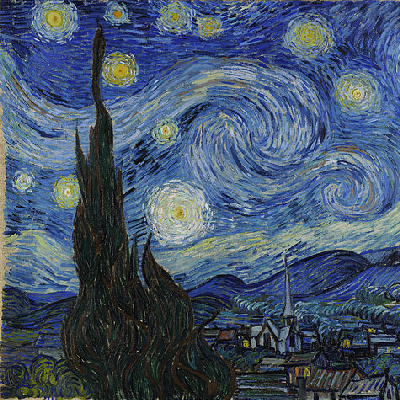

In [23]:
cropped.resize([400, 400])